In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube_USunique.csv",lineterminator='\n')

In [3]:
df['category_name'].unique()

array(['People & Blogs', 'Gaming', 'Entertainment', 'Music',
       'Howto & Style', 'Education', 'Comedy', 'Science & Technology',
       'Film & Animation', 'News & Politics', 'Sports', 'Travel & Events',
       'Pets & Animals', 'Autos & Vehicles', 'Nonprofits & Activism'],
      dtype=object)

In [9]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words #형태소분석할 때 별 필요가 없는 단어들입니다.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
#형태소분석

#반드시 설치!
import re
#!pip install konlpy
import konlpy

from collections import Counter

#워드클라우드 환경설정
#없으면 설치해주세요!
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path
#imread(r뒤에 원하는 이미지 사진 위치 넣어주시면 돼요!, 도지말고 다른거로 해야하나? 뭐로 해야센스있을지 고민이네용! 유튜브 로고 모양!
import requests 
from wordcloud import ImageColorGenerator

FONT_PATH = 'C:/Users/Shon/Documents/R/win-library/4.1/rmarkdown/rmd/h/bootstrap/css/fonts/NanumBarunGothic.ttf'

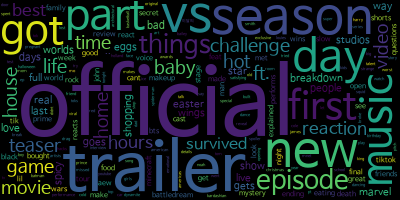

In [15]:
## Entertainment 미국 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Entertainment = df[df['category_name']=='Entertainment'].reset_index()



for i in range (0,len(df_Entertainment)):
    titles.append(df_Entertainment['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles = re.sub(r'[^\.\?\!\w\d\s]','',titles)
titles = titles.lower()

#nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석


n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)
            
Entertainment = Counter(n_v_a_word)

# 드디어 워드클라우드를 생성해보아요!
wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)


wordcloud1.generate_from_frequencies(Entertainment)
wordcloud1.to_image()

In [16]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":n_v_a_word
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title

,word,count
5969,official,355
8932,trailer,276
9542,vs,144
7449,season,137
5800,new,131
2032,day,104
6227,part,93
5650,music,91
3507,got,88
3079,first,83


C:\Users\Shon\AppData\Local\Temp\ipykernel_20556\2268749663.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')
findfont: Font family ['GOTHIC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['GOTHIC'] not found. Falling back to DejaVu Sans.


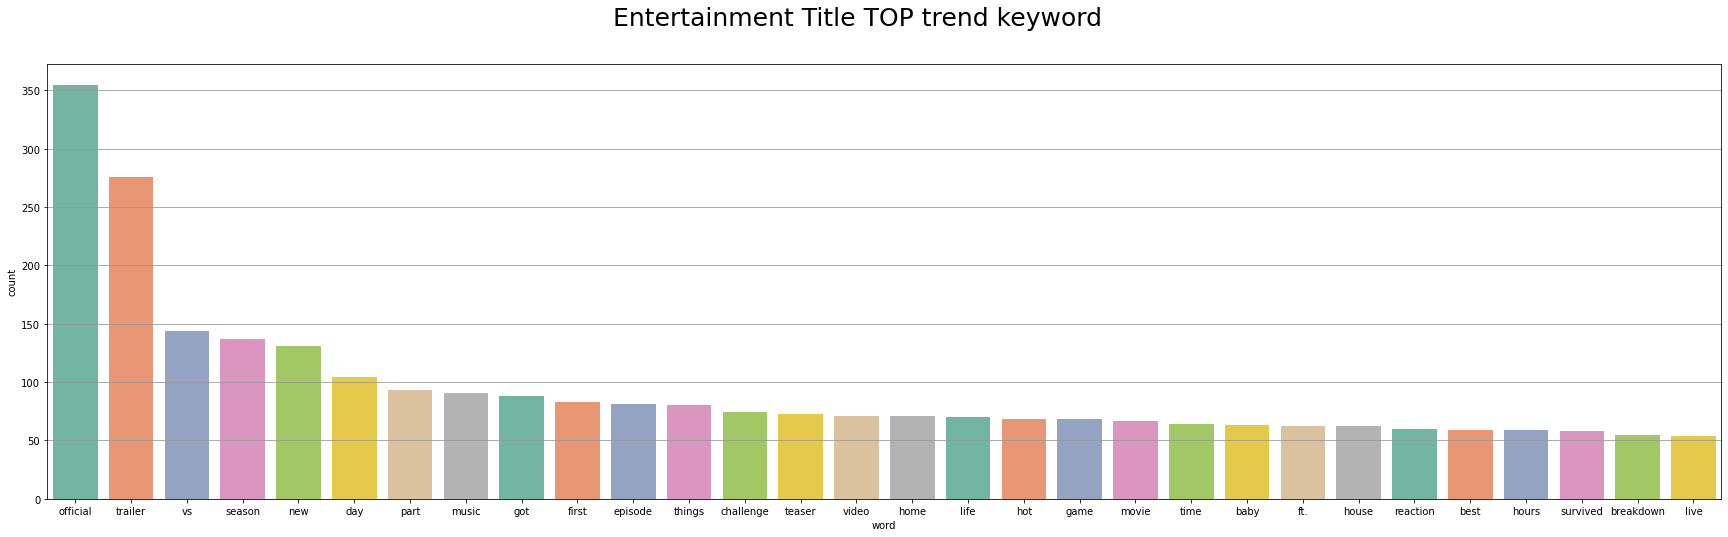

In [17]:
import seaborn as sns
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Entertainment Title TOP trend keyword', size = 25)
plt.show()

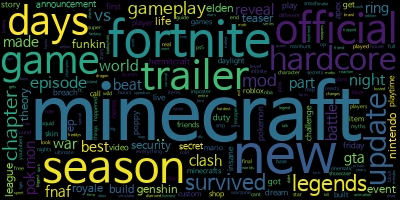

In [18]:
## Gaming 미국 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Gaming = df[df['category_name']=='Gaming'].reset_index()



for i in range (0,len(df_Gaming)):
    titles.append(df_Gaming['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles = re.sub(r'[^\.\?\!\w\d\s]','',titles)
titles = titles.lower()

#nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석


n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)
            
Gaming = Counter(n_v_a_word)

# 드디어 워드클라우드를 생성해보아요!
wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)


wordcloud1.generate_from_frequencies(Gaming)
wordcloud1.to_image()

In [19]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":n_v_a_word
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title

,word,count
3619,minecraft,701
3941,new,307
2101,fortnite,246
5140,season,215
4043,official,175
6143,trailer,166
1309,days,154
2242,game,153
2550,hardcore,149
6447,update,130


C:\Users\Shon\AppData\Local\Temp\ipykernel_20556\11169440.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


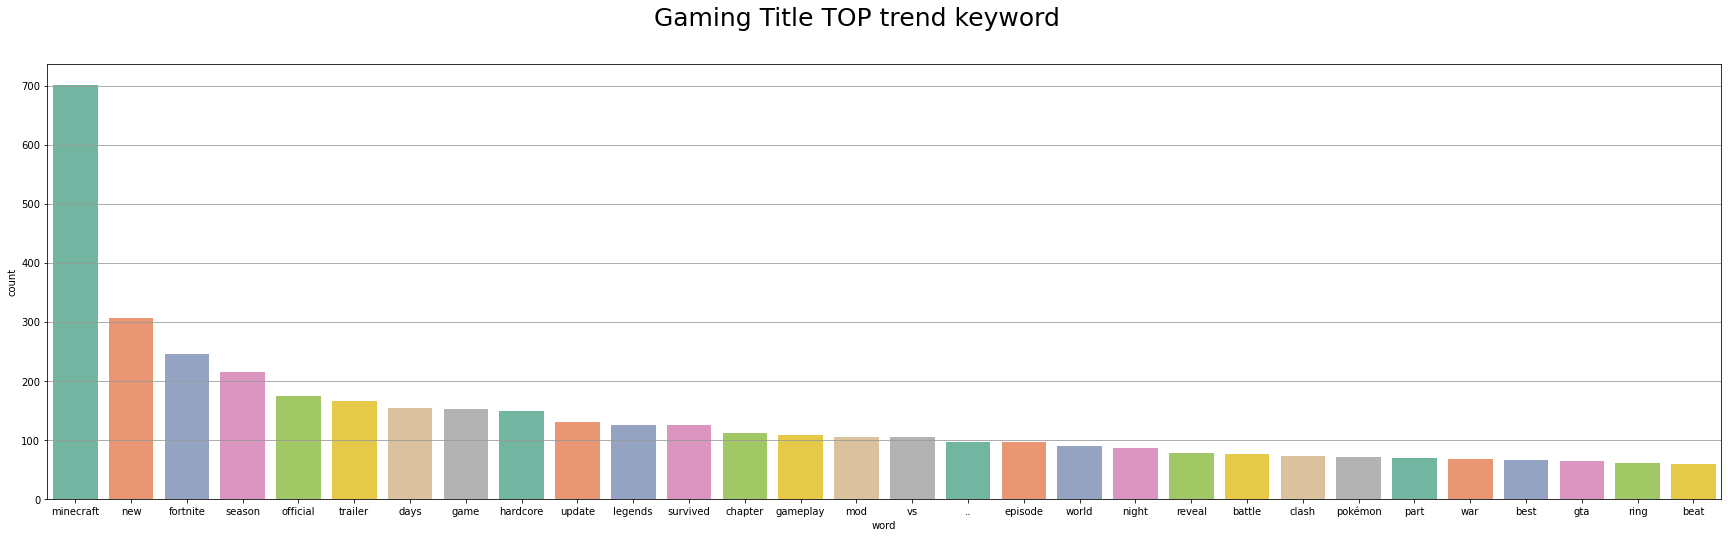

In [20]:
import seaborn as sns
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Gaming Title TOP trend keyword', size = 25)
plt.show()

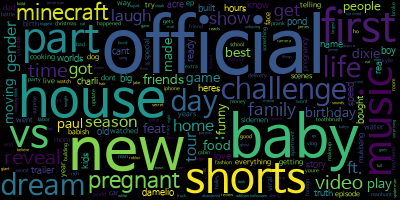

In [21]:
## People & Blogs 미국 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_PeopleBlogs = df[df['category_name']=='People & Blogs'].reset_index()



for i in range (0,len(df_PeopleBlogs)):
    titles.append(df_PeopleBlogs['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles = re.sub(r'[^\.\?\!\w\d\s]','',titles)
titles = titles.lower()

#nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석


n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)
            
PeopleBlogs = Counter(n_v_a_word)

# 드디어 워드클라우드를 생성해보아요!
wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)


wordcloud1.generate_from_frequencies(PeopleBlogs)
wordcloud1.to_image()

C:\Users\Shon\AppData\Local\Temp\ipykernel_20556\282809968.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


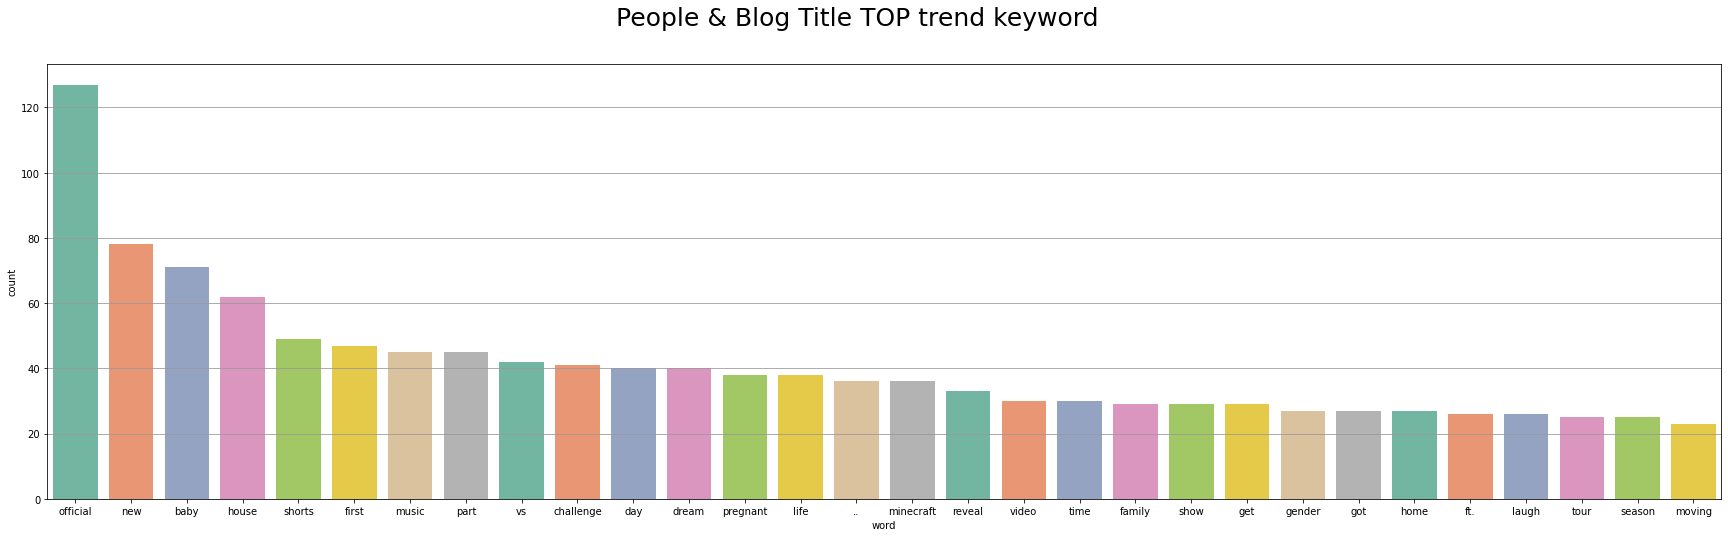

In [23]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":n_v_a_word
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title
import seaborn as sns
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('People & Blog Title TOP trend keyword', size = 25)
plt.show()

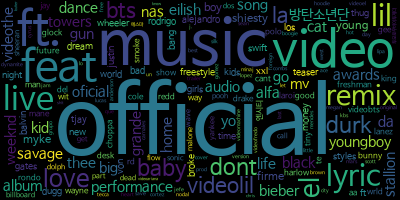

In [24]:
## Music 미국 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Music = df[df['category_name']=='Music'].reset_index()



for i in range (0,len(df_Music)):
    titles.append(df_Music['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles = re.sub(r'[^\.\?\!\w\d\s]','',titles)
titles = titles.lower()

#nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석


n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)
            
Music = Counter(n_v_a_word)

# 드디어 워드클라우드를 생성해보아요!
wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)


wordcloud1.generate_from_frequencies(Music)
wordcloud1.to_image()

C:\Users\Shon\AppData\Local\Temp\ipykernel_20556\282809968.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')
C:\Users\Shon\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Shon\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Shon\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Shon\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missin

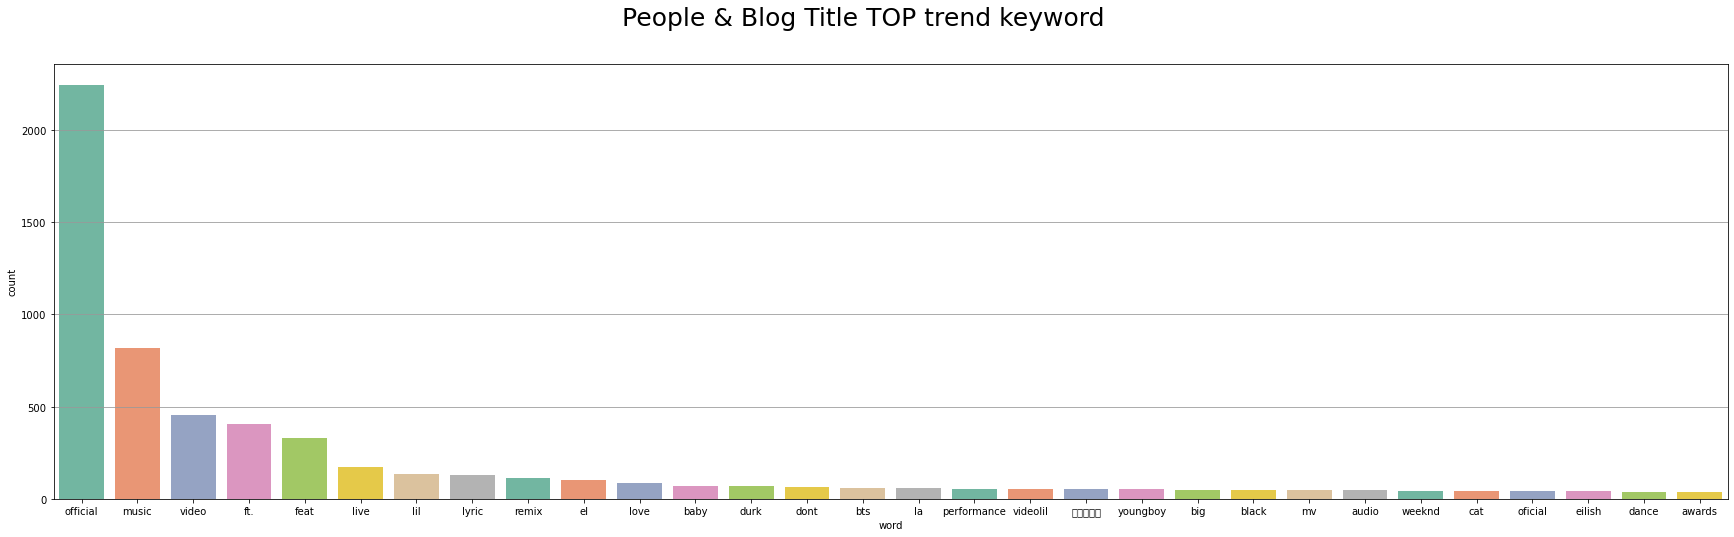

In [25]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":n_v_a_word
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title
import seaborn as sns
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('People & Blog Title TOP trend keyword', size = 25)
plt.show()

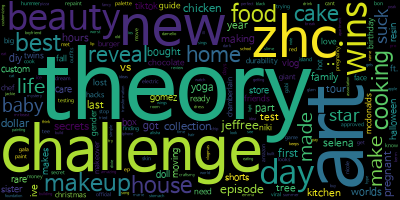

In [26]:
## Howto & Style 미국 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_HowtoStyle = df[df['category_name']=='Howto & Style'].reset_index()



for i in range (0,len(df_HowtoStyle)):
    titles.append(df_HowtoStyle['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles = re.sub(r'[^\.\?\!\w\d\s]','',titles)
titles = titles.lower()

#nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석


n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)
            
HowtoStyle = Counter(n_v_a_word)

# 드디어 워드클라우드를 생성해보아요!
wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)


wordcloud1.generate_from_frequencies(HowtoStyle)
wordcloud1.to_image()

C:\Users\Shon\AppData\Local\Temp\ipykernel_20556\1813093476.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


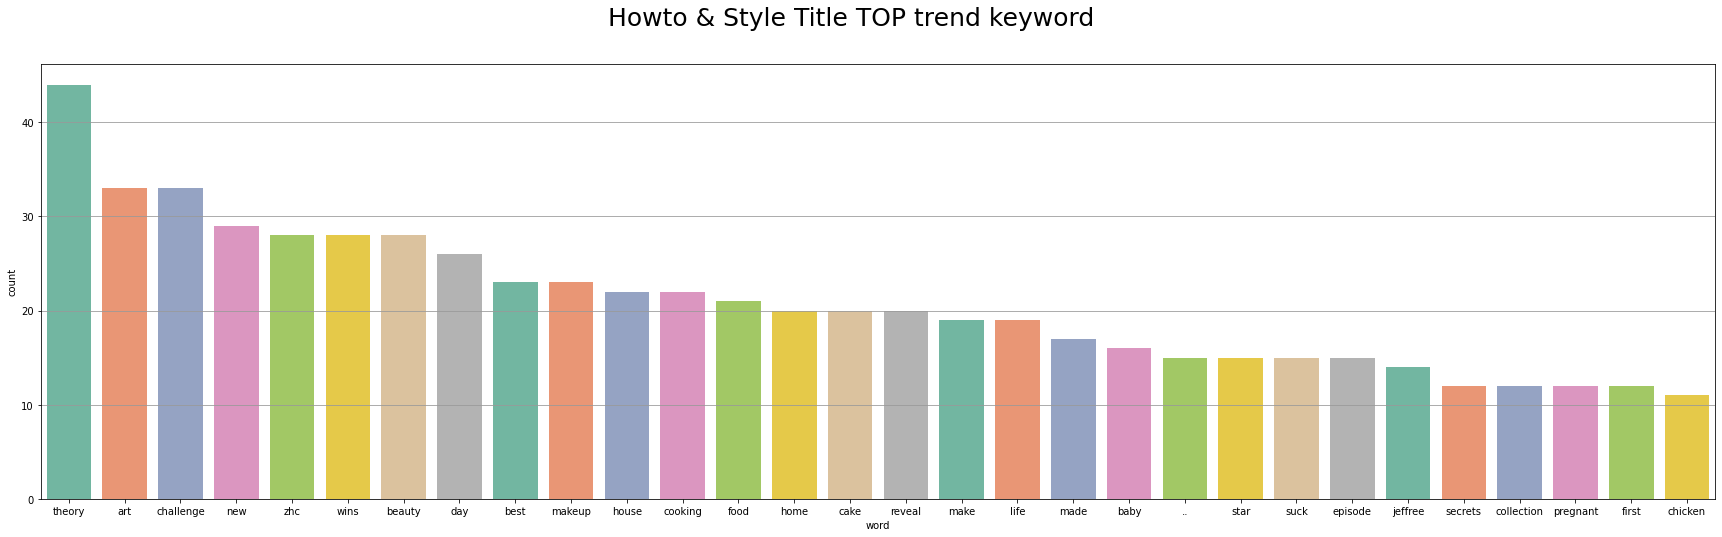

In [28]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":n_v_a_word
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title
import seaborn as sns
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Howto & Style Title TOP trend keyword', size = 25)
plt.show()

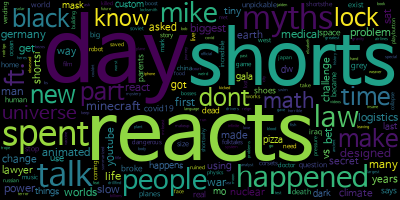

In [29]:
## Education 미국 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Education = df[df['category_name']=='Education'].reset_index()



for i in range (0,len(df_Education)):
    titles.append(df_Education['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles = re.sub(r'[^\.\?\!\w\d\s]','',titles)
titles = titles.lower()

#nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석


n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)
            
Education = Counter(n_v_a_word)

# 드디어 워드클라우드를 생성해보아요!
wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)


wordcloud1.generate_from_frequencies(Education)
wordcloud1.to_image()

C:\Users\Shon\AppData\Local\Temp\ipykernel_20556\75046520.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


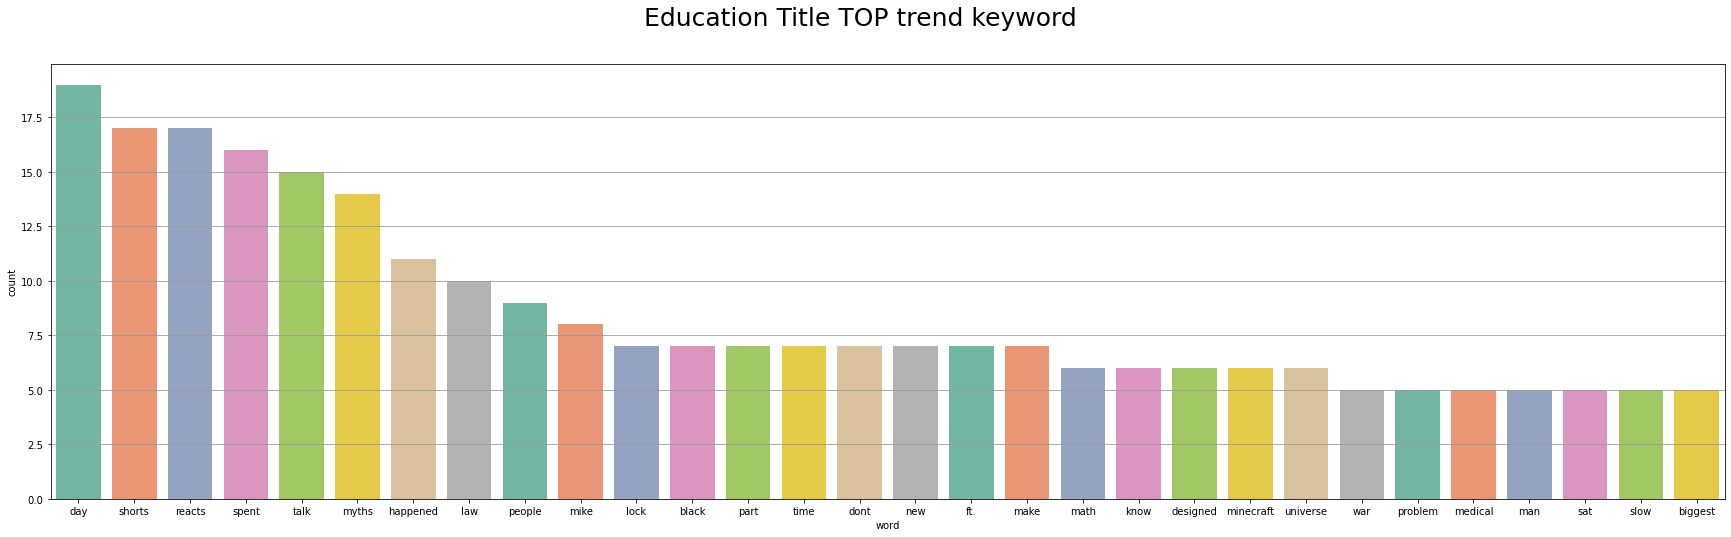

In [30]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":n_v_a_word
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title
import seaborn as sns
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Education Title TOP trend keyword', size = 25)
plt.show()

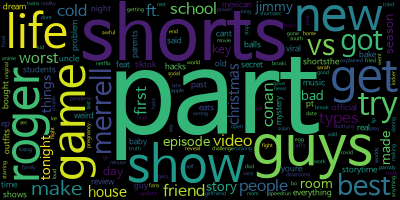

In [32]:
## Comedy 미국 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Comedy = df[df['category_name']=='Comedy'].reset_index()



for i in range (0,len(df_Comedy)):
    titles.append(df_Comedy['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles = re.sub(r'[^\.\?\!\w\d\s]','',titles)
titles = titles.lower()

#nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석


n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)
            
Comedy= Counter(n_v_a_word)

# 드디어 워드클라우드를 생성해보아요!
wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)


wordcloud1.generate_from_frequencies(Comedy)
wordcloud1.to_image()

C:\Users\Shon\AppData\Local\Temp\ipykernel_20556\746580338.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


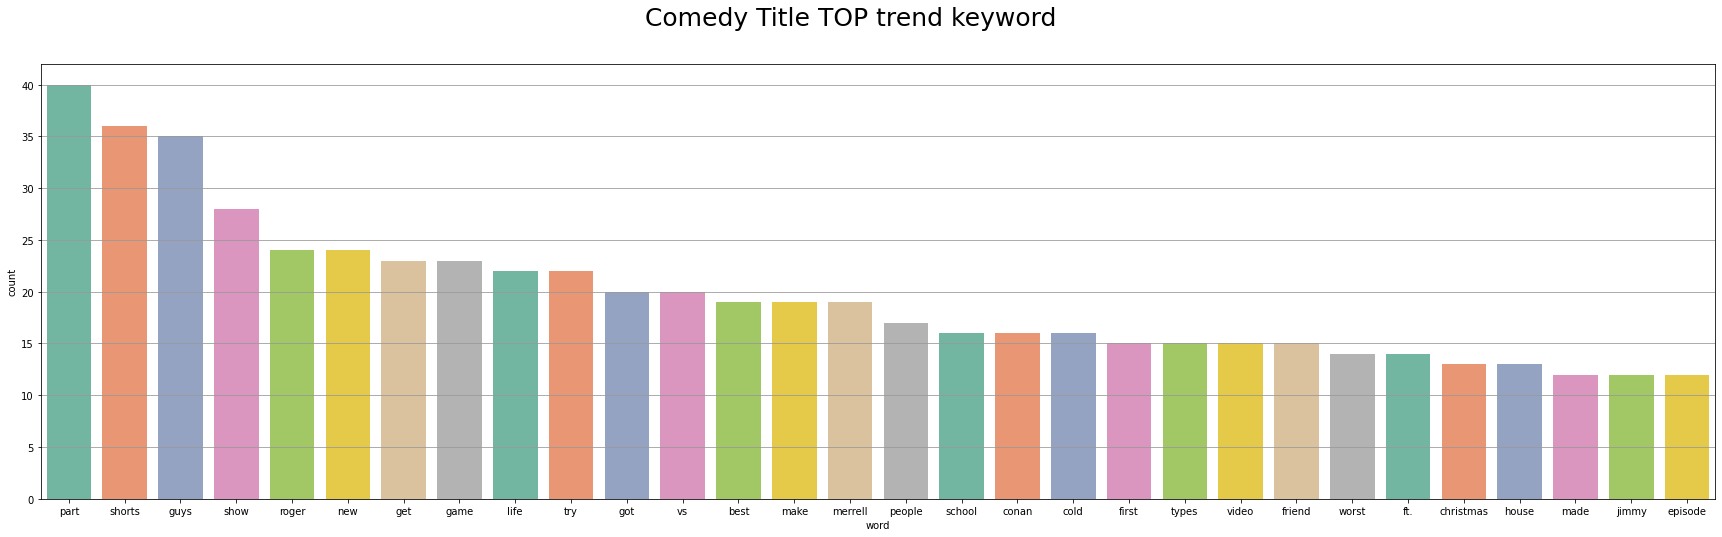

In [33]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":n_v_a_word
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title
import seaborn as sns
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Comedy Title TOP trend keyword', size = 25)
plt.show()

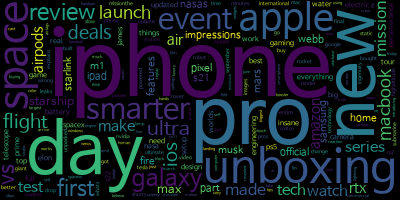

In [41]:
## Science & Technology 미국 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_ScienceTechnology = df[df['category_name']=='Science & Technology'].reset_index()



for i in range (0,len(df_ScienceTechnology)):
    titles.append(df_ScienceTechnology['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles = re.sub(r'[^\.\?\!\w\d\s]','',titles)
titles = titles.lower()

#nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석


n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)
            
ScienceTechnology= Counter(n_v_a_word)

# 드디어 워드클라우드를 생성해보아요!
wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)


wordcloud1.generate_from_frequencies(ScienceTechnology)
wordcloud1.to_image()

C:\Users\Shon\AppData\Local\Temp\ipykernel_20556\3848735116.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


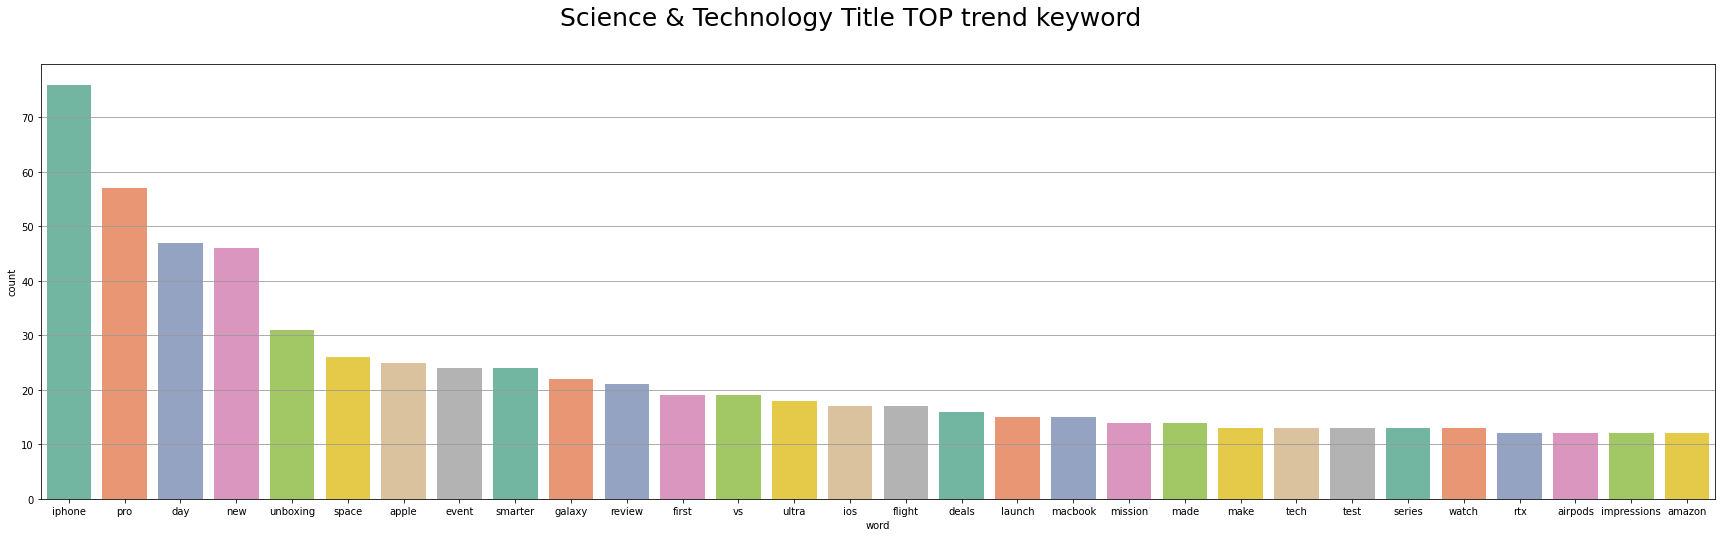

In [42]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":n_v_a_word
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title
import seaborn as sns
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Science & Technology Title TOP trend keyword', size = 25)
plt.show()

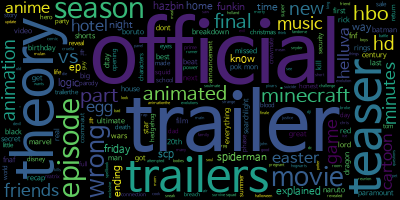

In [43]:
## Film & Animation 미국 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_FilmAnimation = df[df['category_name']=='Film & Animation'].reset_index()



for i in range (0,len(df_FilmAnimation)):
    titles.append(df_FilmAnimation['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles = re.sub(r'[^\.\?\!\w\d\s]','',titles)
titles = titles.lower()

#nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석


n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)
            
FilmAnimation= Counter(n_v_a_word)

# 드디어 워드클라우드를 생성해보아요!
wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)


wordcloud1.generate_from_frequencies(FilmAnimation)
wordcloud1.to_image()

C:\Users\Shon\AppData\Local\Temp\ipykernel_20556\1705621473.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


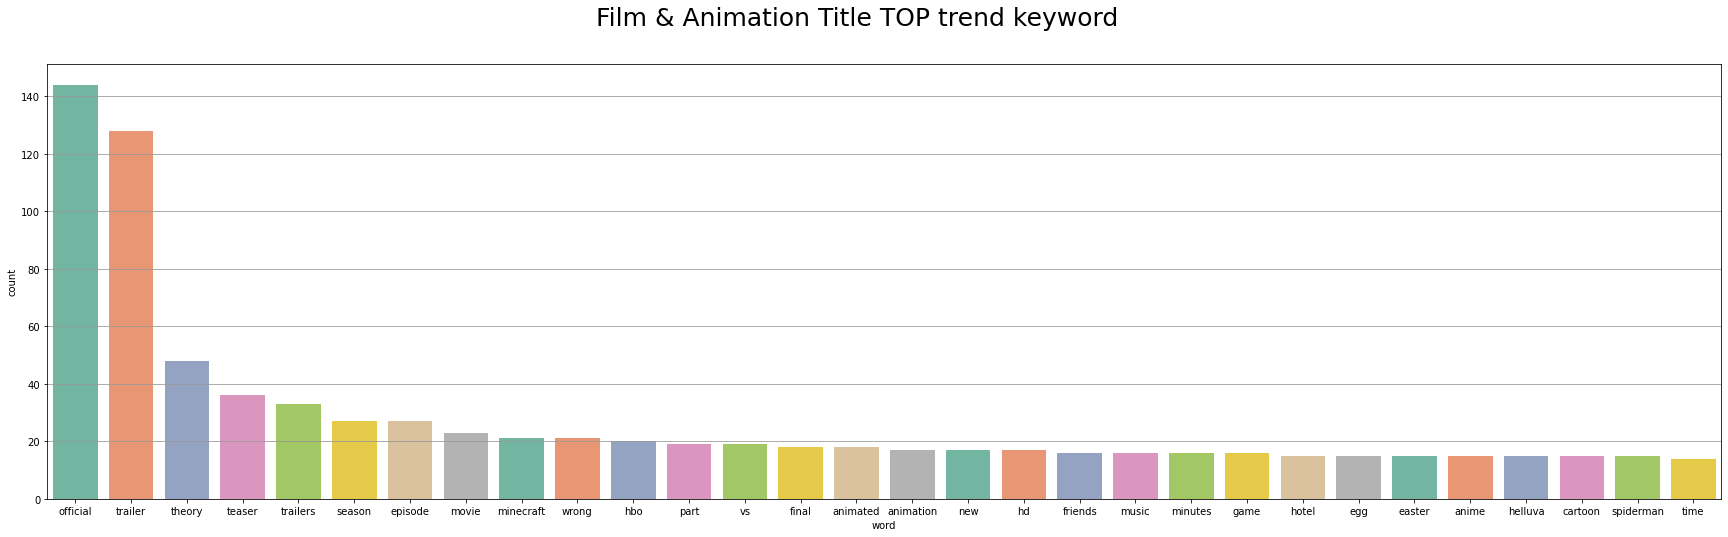

In [44]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":n_v_a_word
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title
import seaborn as sns
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Film & Animation Title TOP trend keyword', size = 25)
plt.show()

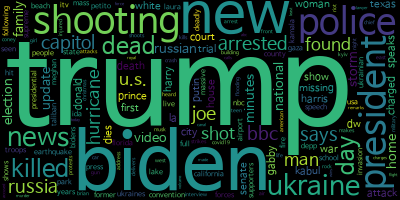

In [45]:
## News & Politics 미국 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_NewsPolitics = df[df['category_name']=='News & Politics'].reset_index()



for i in range (0,len(df_NewsPolitics)):
    titles.append(df_NewsPolitics['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles = re.sub(r'[^\.\?\!\w\d\s]','',titles)
titles = titles.lower()

#nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석


n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)
            
NewsPolitics= Counter(n_v_a_word)

# 드디어 워드클라우드를 생성해보아요!
wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)


wordcloud1.generate_from_frequencies(NewsPolitics)
wordcloud1.to_image()

C:\Users\Shon\AppData\Local\Temp\ipykernel_20556\167759973.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


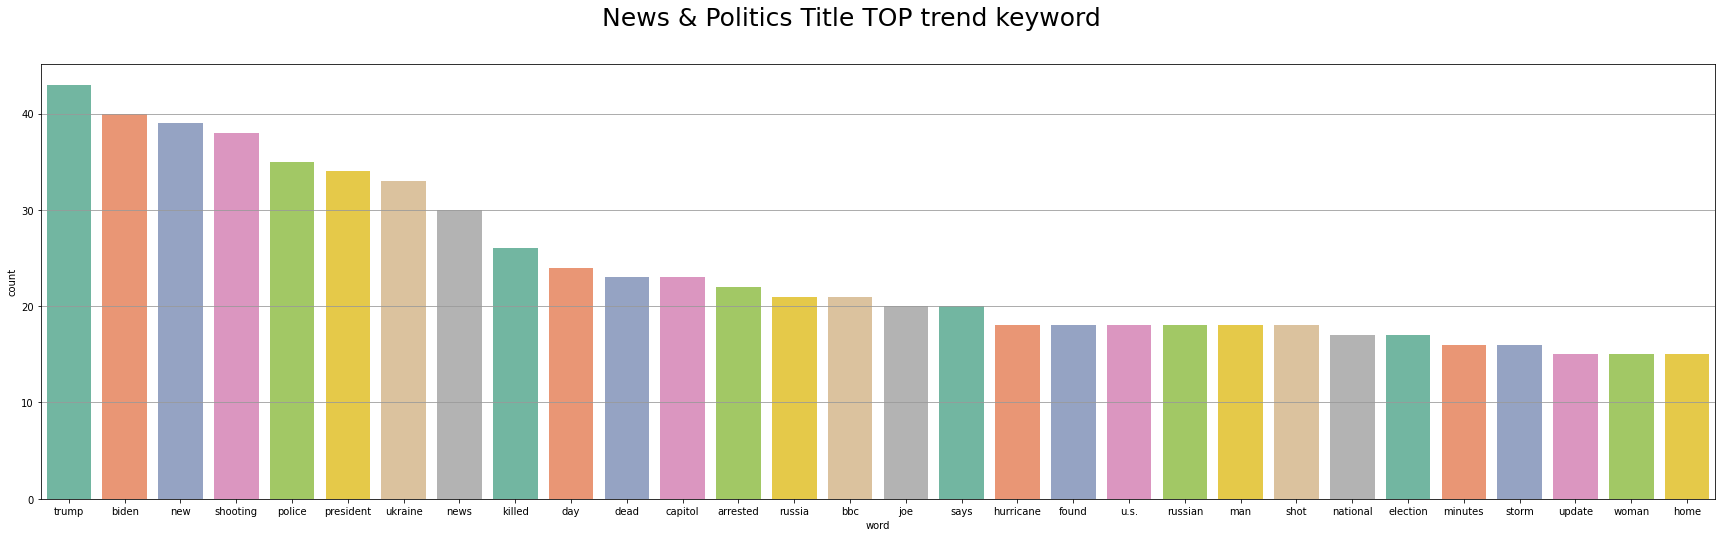

In [46]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":n_v_a_word
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title
import seaborn as sns
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('News & Politics Title TOP trend keyword', size = 25)
plt.show()

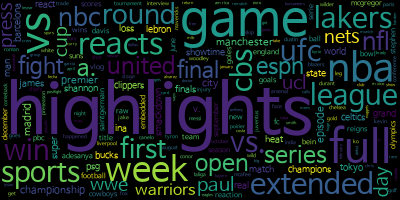

In [47]:
## Sports 미국 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Sports = df[df['category_name']=='Sports'].reset_index()



for i in range (0,len(df_Sports)):
    titles.append(df_Sports['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles = re.sub(r'[^\.\?\!\w\d\s]','',titles)
titles = titles.lower()

#nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석


n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)
            
Sports= Counter(n_v_a_word)

# 드디어 워드클라우드를 생성해보아요!
wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)


wordcloud1.generate_from_frequencies(Sports)
wordcloud1.to_image()

C:\Users\Shon\AppData\Local\Temp\ipykernel_20556\965826299.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


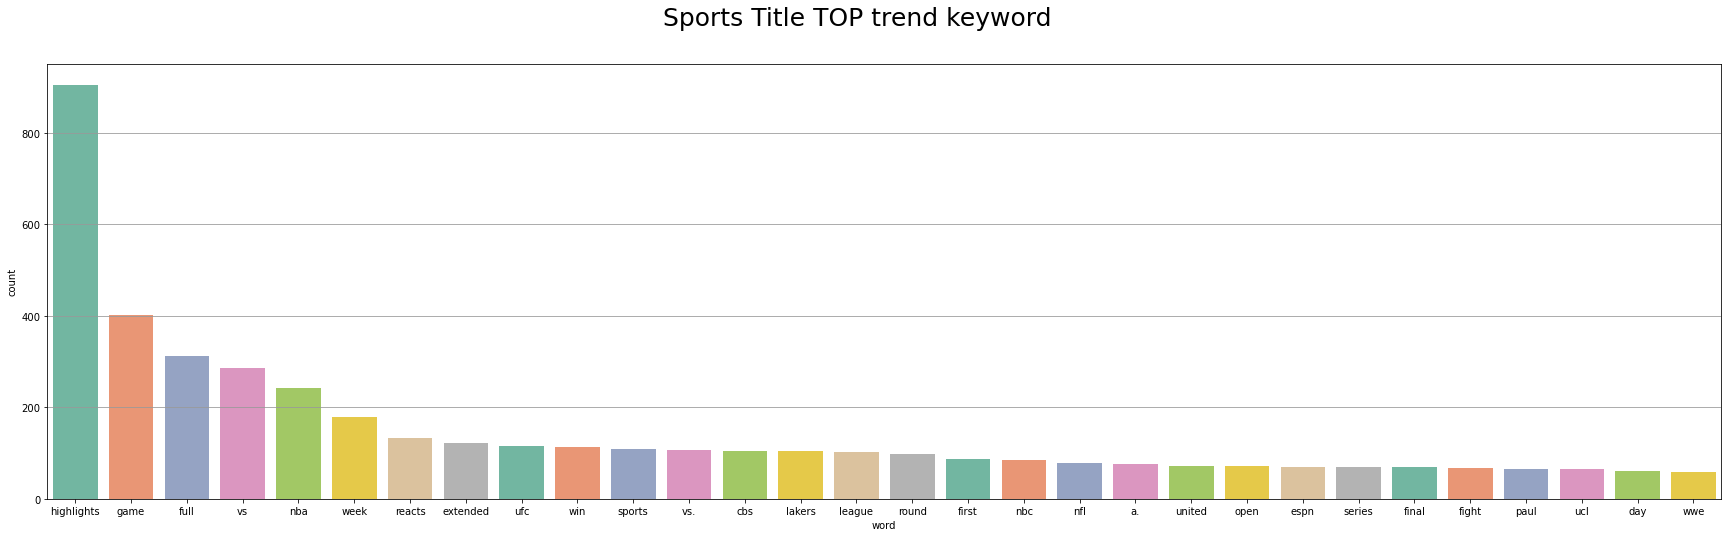

In [48]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":n_v_a_word
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title
import seaborn as sns
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Sports Title TOP trend keyword', size = 25)
plt.show()

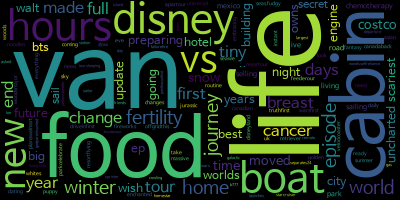

In [49]:
## Travel & Events 미국 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_TravelEvents = df[df['category_name']=='Travel & Events'].reset_index()



for i in range (0,len(df_TravelEvents)):
    titles.append(df_TravelEvents['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles = re.sub(r'[^\.\?\!\w\d\s]','',titles)
titles = titles.lower()

#nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석


n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)
            
TravelEvents= Counter(n_v_a_word)

# 드디어 워드클라우드를 생성해보아요!
wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)


wordcloud1.generate_from_frequencies(TravelEvents)
wordcloud1.to_image()

C:\Users\Shon\AppData\Local\Temp\ipykernel_20556\2798800309.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


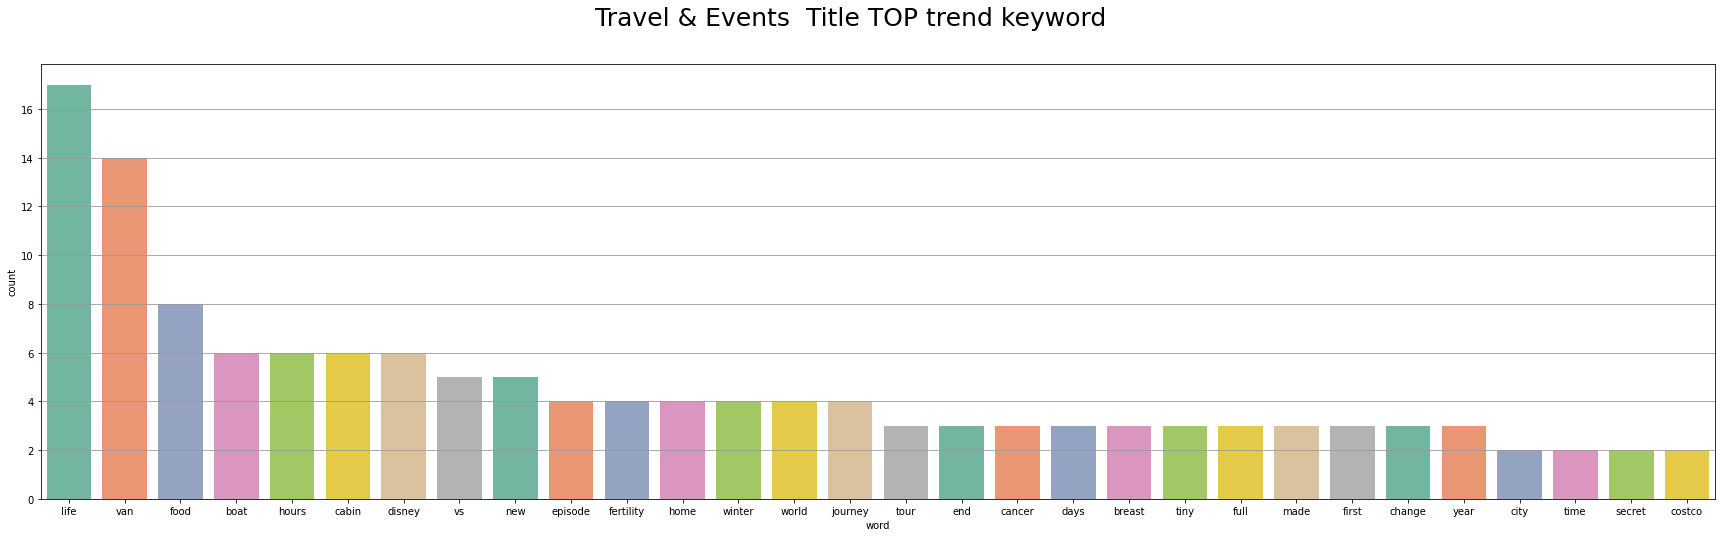

In [50]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":n_v_a_word
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title
import seaborn as sns
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Travel & Events  Title TOP trend keyword', size = 25)
plt.show()

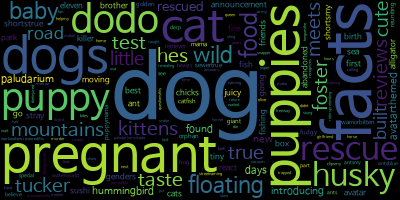

In [53]:
## Pets & Animals 미국 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_PetsAnimals = df[df['category_name']=='Pets & Animals'].reset_index()



for i in range (0,len(df_PetsAnimals)):
    titles.append(df_PetsAnimals['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles = re.sub(r'[^\.\?\!\w\d\s]','',titles)
titles = titles.lower()

#nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석


n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)
            
PetsAnimals= Counter(n_v_a_word)

# 드디어 워드클라우드를 생성해보아요!
wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)


wordcloud1.generate_from_frequencies(PetsAnimals)
wordcloud1.to_image()

C:\Users\Shon\AppData\Local\Temp\ipykernel_20556\4011370829.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


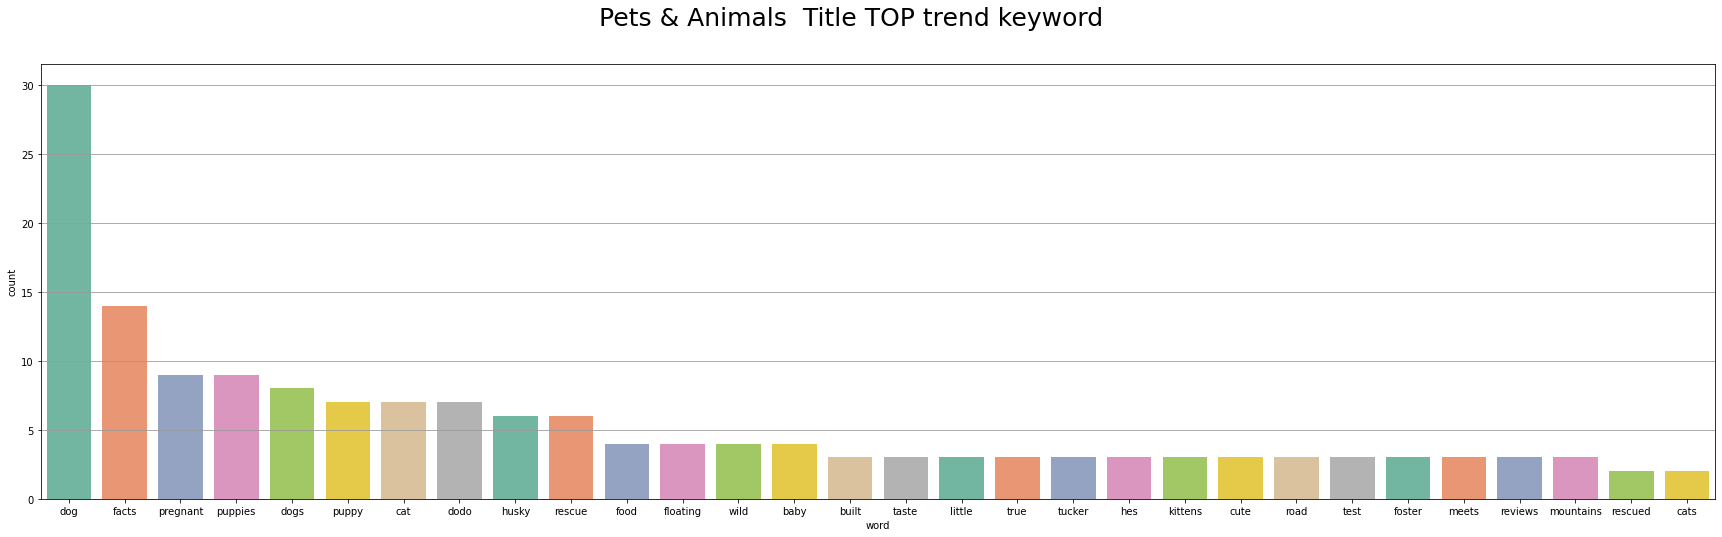

In [54]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":n_v_a_word
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title
import seaborn as sns
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Pets & Animals  Title TOP trend keyword', size = 25)
plt.show()

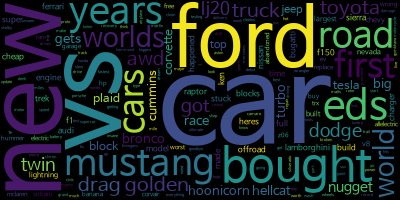

In [55]:
## Autos & Vehicles 미국 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_AutosVehicles = df[df['category_name']=='Autos & Vehicles'].reset_index()



for i in range (0,len(df_AutosVehicles)):
    titles.append(df_AutosVehicles['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)
titles = re.sub(r'[^\.\?\!\w\d\s]','',titles)
titles = titles.lower()

#nltk.download('averaged_perceptron_tagger')
title_pos_us = nltk.word_tokenize(titles) #토큰화하기
title_pos_us = nltk.pos_tag(title_pos_us) #형태소 분석


n_v_a_word = []
for word, pos in title_pos_us:
    if 'NN' in pos:
        n_v_a_word.append(word)
    elif 'VB' in pos:
        n_v_a_word.append(word)
    elif 'JJ' in pos:
        n_v_a_word.append(word)
    else: pass


stop_words.append('im')
stop_words.append('none')#이상한 거 추가해주기
unique_word = set(n_v_a_word)
for word in unique_word:
    if word in stop_words or len(word) == 1:
        while word in n_v_a_word:
            n_v_a_word.remove(word)
            
AutosVehicles= Counter(n_v_a_word)

# 드디어 워드클라우드를 생성해보아요!
wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    #background_color="white",
    #   random_state=1,
)


wordcloud1.generate_from_frequencies(AutosVehicles)
wordcloud1.to_image()

C:\Users\Shon\AppData\Local\Temp\ipykernel_20556\2908548664.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#999999',axis='y')


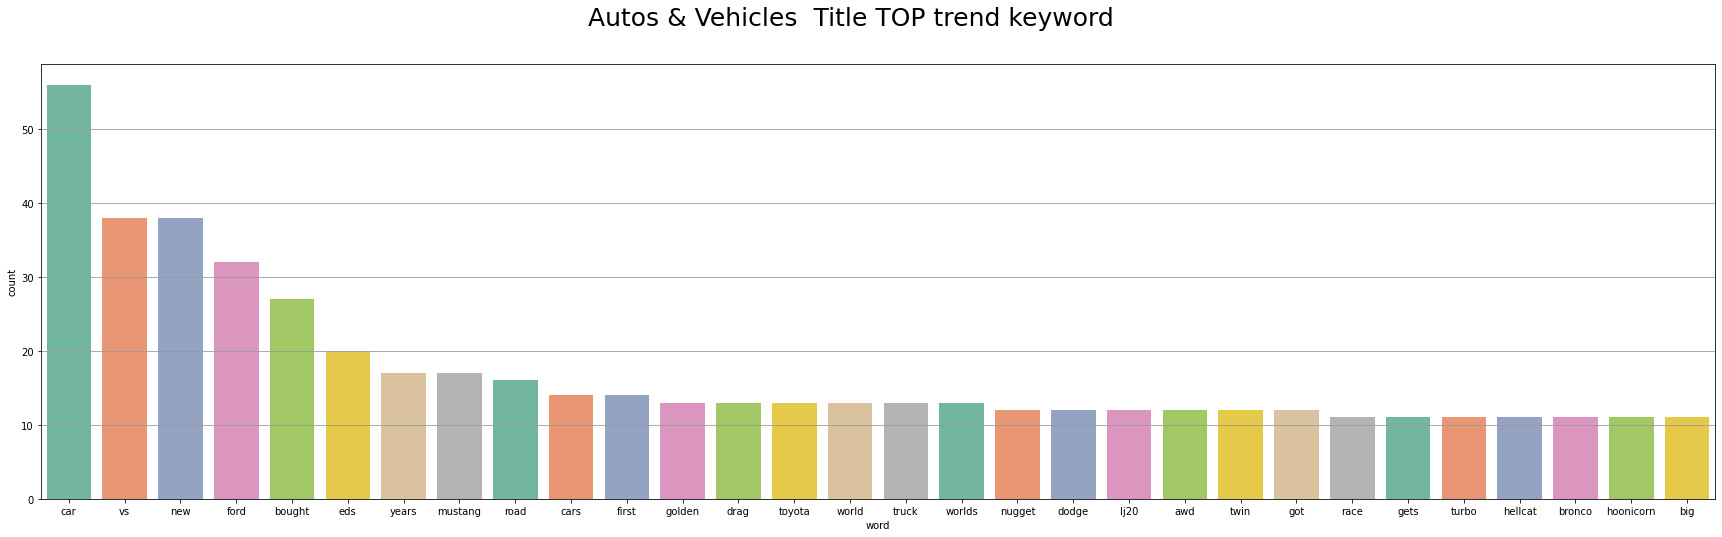

In [56]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":n_v_a_word
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title
import seaborn as sns
plt.figure(figsize=(30,8))
sns.barplot(x="word",y="count", data=tot_title,palette='Set2')
plt.grid(b=True, color='#999999',axis='y')
plt.suptitle('Autos & Vehicles  Title TOP trend keyword', size = 25)
plt.show()